In [2]:
import numpy as np
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

import pickle
import json

import warnings
warnings.filterwarnings("ignore")

#### 1.Problem Statement

In [ ]:
To Predicting concrete compressive strength based on its ingredients.
1.cement
2.blast_furnace_slag
3.fly_ash
4.water
5.superplasticizer
6.coarse_aggregate
7.fine_aggregate 
8.age

#### 2.Data Gathering

In [3]:
df = pd.read_csv("concrete_data.csv")
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df.columns.tolist()

['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'fine_aggregate ',
 'age',
 'concrete_compressive_strength']

#### 3.Exploratory Data Analysis¶

##### 1.Missing values

In [5]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [ ]:
DataFrame contains no missing values

##### 2.Categorical Data(Object DataType)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [ ]:
DataFrame has no categorical data(object data type)

#### 4.Feature Engineering

In [ ]:
No need to perform feature engineering as DataFrame contains no missing value and no object data type

#### 5.Feature selection

##### 1.Linearity

In [8]:
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


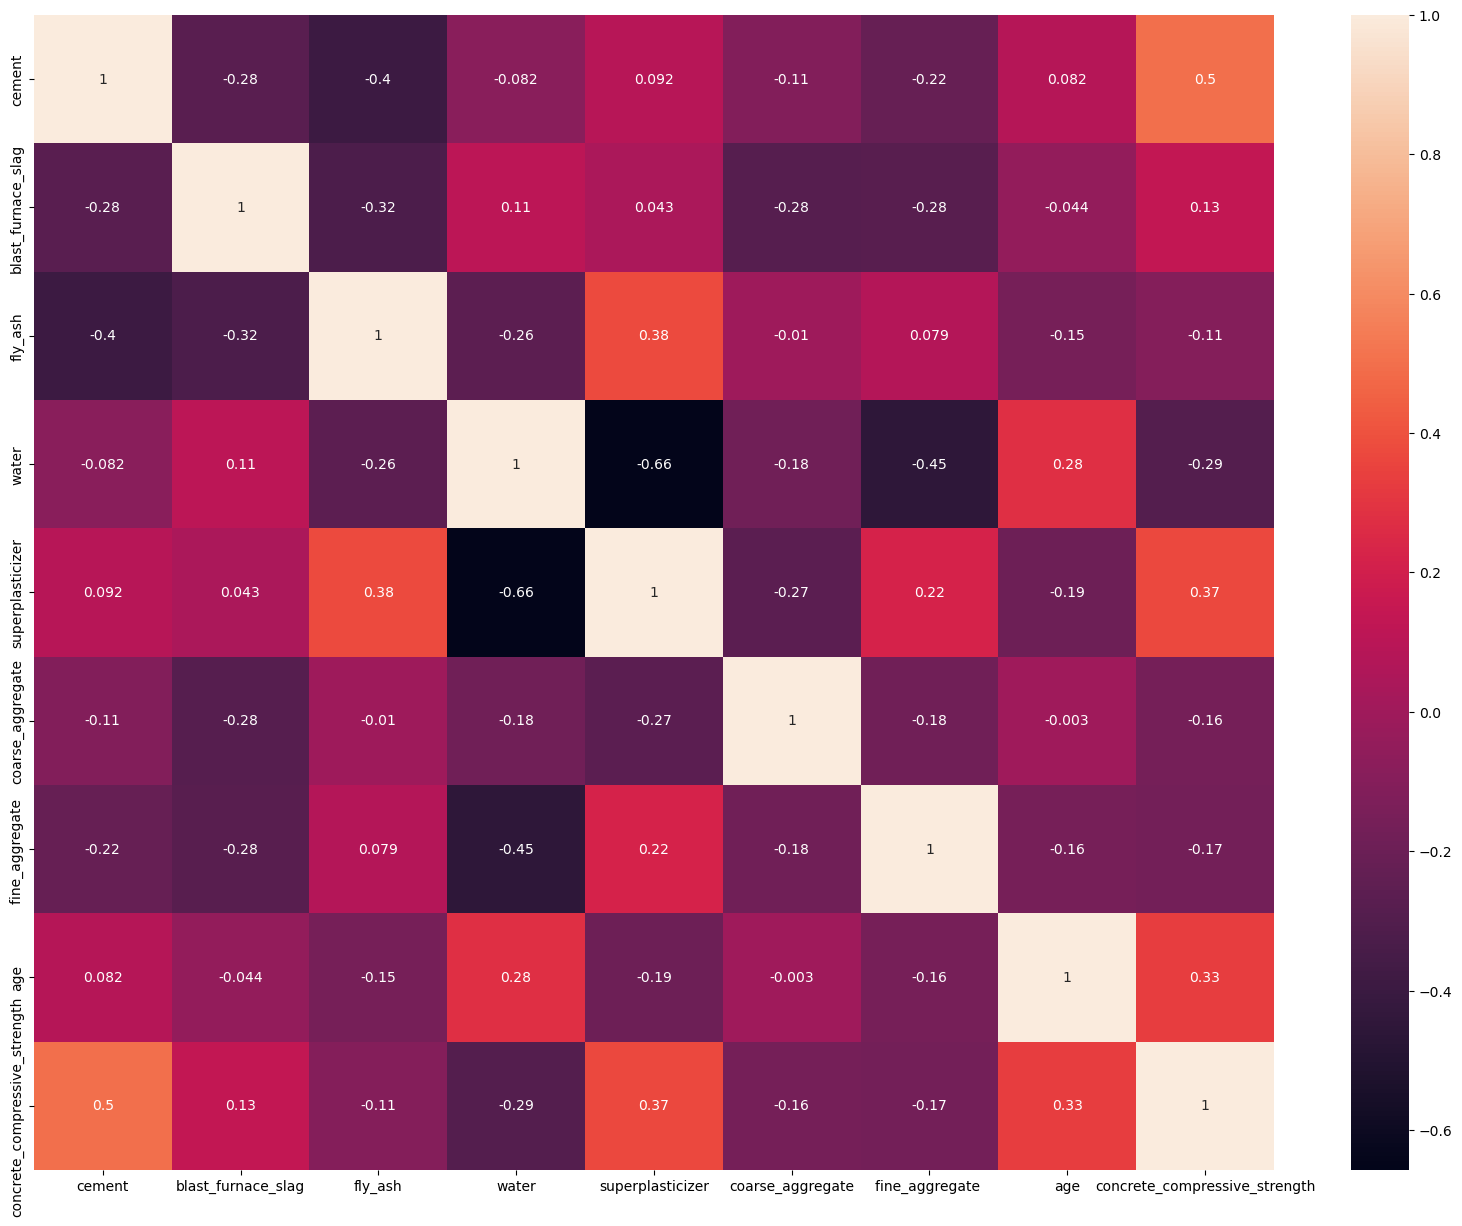

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot = True)
plt.savefig("Concrete_corr.png")

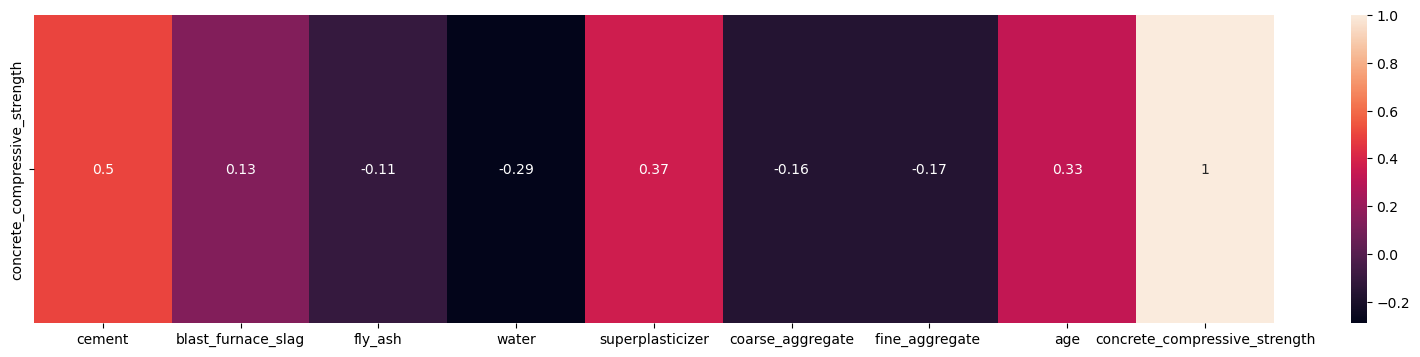

In [10]:
plt.figure(figsize=(20,4))
sns.heatmap(df.corr().tail(1),annot = True)
plt.savefig("Concrete_corr.png")

##### 2.No Multicolinearity

In [11]:
x = df.drop("concrete_compressive_strength",axis = 1)
y = df["concrete_compressive_strength"]

In [12]:
x.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age'],
      dtype='object')

In [13]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
vif_list

[15.456716721850174,
 3.329127167858221,
 4.1478331464409814,
 82.1575690843567,
 5.471093727729409,
 84.9557786410409,
 72.79099547091855,
 1.6994592714144867]

In [14]:
vif_values = pd.Series(vif_list,index = x.columns)
vif_values

cement                15.456717
blast_furnace_slag     3.329127
fly_ash                4.147833
water                 82.157569
superplasticizer       5.471094
coarse_aggregate      84.955779
fine_aggregate        72.790995
age                    1.699459
dtype: float64

<Axes: >

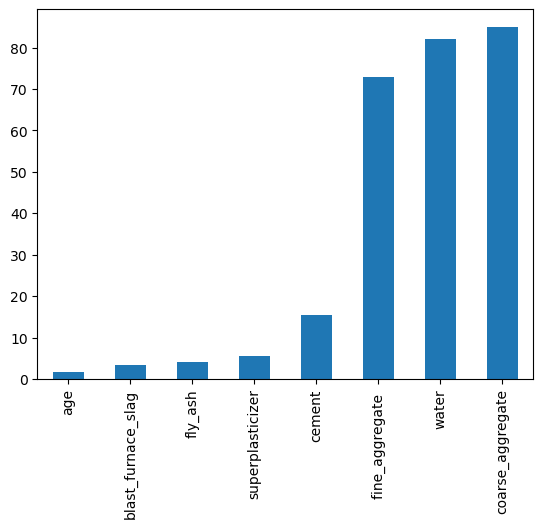

In [15]:
vif_values.sort_values().plot(kind = "bar")

#### 6.Model Training

In [16]:
x

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [17]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1030, dtype: float64

#### Data Splitting

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.6,
                                                random_state = 2)

In [19]:
x_train

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
371,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,28
32,198.6,132.4,0.0,192.0,0.0,978.4,825.5,180
530,359.0,19.0,141.0,154.0,10.9,942.0,801.0,56
640,400.0,0.0,0.0,187.0,0.0,1025.0,745.0,7
985,255.3,98.8,77.0,188.6,6.5,919.0,749.3,28
...,...,...,...,...,...,...,...,...
360,218.2,54.6,123.8,140.8,11.9,1075.7,792.7,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
299,290.4,0.0,96.2,168.1,9.4,961.2,865.0,3
493,387.0,20.0,94.0,157.0,11.6,938.0,845.0,7


In [20]:
y_train

371    30.22
32     41.72
530    66.78
640    30.14
985    33.80
       ...  
360    35.96
466    33.56
299    22.50
493    41.67
527    35.75
Name: concrete_compressive_strength, Length: 618, dtype: float64

In [21]:
x_test

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
456,194.7,0.0,100.5,170.2,7.5,998.0,901.8,56
988,153.6,144.2,112.3,220.1,10.1,923.2,657.9,28
809,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28
581,181.9,272.8,0.0,185.7,0.0,1012.4,714.3,7
549,333.0,0.0,0.0,192.0,0.0,931.2,842.6,90
...,...,...,...,...,...,...,...,...
803,393.0,0.0,0.0,192.0,0.0,940.0,758.0,3
440,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,28
453,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,56
601,339.0,0.0,0.0,197.0,0.0,968.0,781.0,28


In [22]:
y_test

456    43.39
988    16.50
809    19.69
581    12.37
549    41.68
       ...  
803    19.11
440    24.85
453    31.72
601    32.04
203    40.57
Name: concrete_compressive_strength, Length: 412, dtype: float64

#### Creating Instance of linear Regression

In [23]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [24]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [25]:
linear_reg.coef_

array([ 0.12903141,  0.10856062,  0.10112943, -0.13403777,  0.23441232,
        0.02074565,  0.02289142,  0.10642446])

In [26]:
np.around(linear_reg.coef_,2,)

array([ 0.13,  0.11,  0.1 , -0.13,  0.23,  0.02,  0.02,  0.11])

In [27]:
np.around(linear_reg.coef_,2,)[1]

0.11

In [28]:
linear_reg.intercept_

-33.77563854742058

In [29]:
np.around(linear_reg.intercept_,2)

-33.78

#### 7.Model Evaluation¶

##### 1.Testing Data Evaluation

In [30]:
y_pred = linear_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error is :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error is :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print(" Mean absolute Error is :",mae)

r2_value = r2_score(y_test,y_pred)
print(" R_Square value is :",r2_value)

n = x_test.shape[0]
k = x_test.shape[1]
adj_r1 = 1-((1-r2_value)*(n-1)/(n-k-1))
print("Adjusted R_Square value is :",adj_r1)

Mean Squared Error is : 109.02694614121988
Root Mean Squared Error is : 10.441596915281679
 Mean absolute Error is : 8.459012350161649
 R_Square value is : 0.595880479850027
Adjusted R_Square value is : 0.5878582561249655


##### 2.1.Training Data Evaluation

In [31]:
y_pred_train  = linear_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error is :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error is :",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print(" Mean absolute Error is :",mae)

r2_value = r2_score(y_train,y_pred_train)
print(" R_Square value is :",r2_value)

n = x_train.shape[0]
k = x_train.shape[1]
adj_r1 = 1-((1-r2_value)*(n-1)/(n-k-1))
print("Adjusted R_Square value is :",adj_r1)

Mean Squared Error is : 107.0013465659189
Root Mean Squared Error is : 10.344145521304256
 Mean absolute Error is : 8.084119985057265
 R_Square value is : 0.622904286708423
Adjusted R_Square value is : 0.6179506484385829


In [32]:
r_squared_list = []
adj_r2_list = []
for i in range(1,x_train.shape[1]+1):
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(x_train.iloc[:,:i],y_train)
    r2_value = linear_reg_model.score(x_train.iloc[:,:i],y_train)
    r_squared_list.append(r2_value)
    
    n = x_train.shape[0]
    k = i
    adj_r2 = 1-((1-r2_value)*(n-1))/(n-k-1)
    adj_r2_list.append(adj_r2)

In [33]:
r_squared_list

[0.28943579653398666,
 0.36203518079971664,
 0.4437991428897644,
 0.47092344394274377,
 0.4751350377335891,
 0.47592989597900714,
 0.4760316102706432,
 0.622904286708423]

In [34]:
adj_r2_list

[0.2882822832166717,
 0.359960498460854,
 0.4410815491253821,
 0.467471068373039,
 0.47084692529677197,
 0.4707835447120252,
 0.47001885825735557,
 0.6179506484385829]

In [35]:
new_x_train = x_train.copy()
new_x_train['TARGET'] = y_train
new_x_train.corr()['TARGET']

cement                0.537992
blast_furnace_slag    0.098413
fly_ash              -0.104491
water                -0.263566
superplasticizer      0.343408
coarse_aggregate     -0.167473
fine_aggregate       -0.192698
age                   0.301117
TARGET                1.000000
Name: TARGET, dtype: float64

In [36]:
r2_data = {'Correlation':new_x_train.corr()['TARGET'],
           'R_Squared':r_squared_list,
       'Adj R_Squared':adj_r2_list
           }
r2_df = pd.DataFrame(r2_data, index = x_train.columns)
r2_df

,Correlation,R_Squared,Adj R_Squared
cement,0.537992,0.289436,0.288282
blast_furnace_slag,0.098413,0.362035,0.359960
fly_ash,-0.104491,0.443799,0.441082
water,-0.263566,0.470923,0.467471
superplasticizer,0.343408,0.475135,0.470847
coarse_aggregate,-0.167473,0.475930,0.470784
fine_aggregate,-0.192698,0.476032,0.470019
age,0.301117,0.622904,0.617951


#### Assumptions

#### 1.Normality of Residual

In [37]:
residual = y_train - y_pred_train
residual

371    -1.757976
32      2.881016
530    12.159987
640    -1.695229
985     0.679333
         ...    
360    -2.735300
466    -1.185387
299   -10.656528
493    -7.389787
527   -13.655214
Name: concrete_compressive_strength, Length: 618, dtype: float64

##### Checking Normality of residual

##### 1.kdeplot

<Axes: xlabel='concrete_compressive_strength', ylabel='Density'>

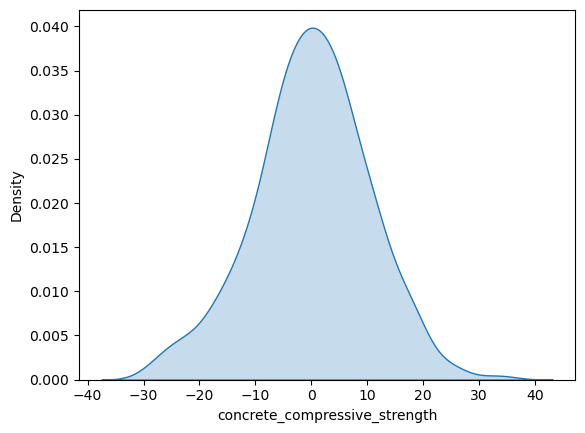

In [38]:
sns.kdeplot(residual,fill = True)

##### 2.Histplot

<Axes: xlabel='concrete_compressive_strength', ylabel='Count'>

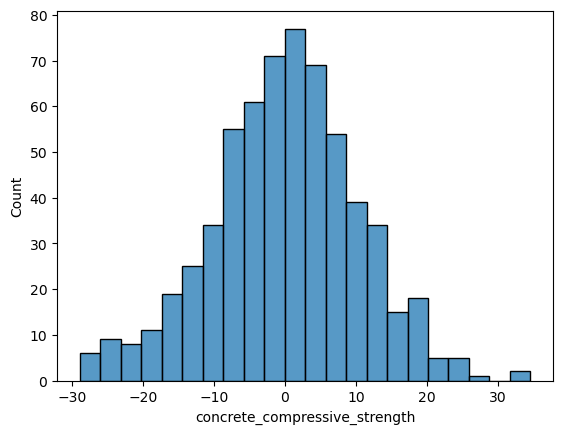

In [39]:
sns.histplot(residual)

<Axes: xlabel='concrete_compressive_strength', ylabel='Count'>

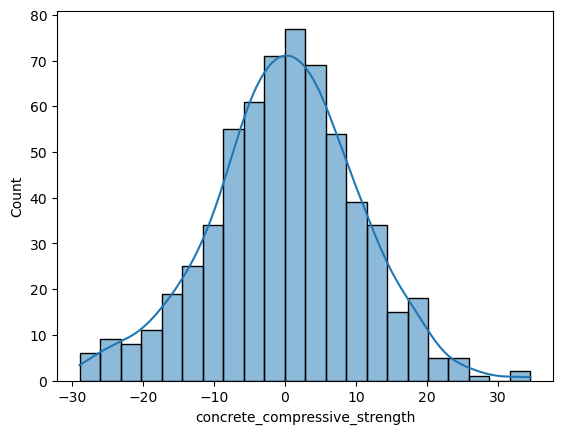

In [40]:
sns.histplot(residual,kde = True)

##### 3.Distplot

<Axes: xlabel='concrete_compressive_strength', ylabel='Density'>

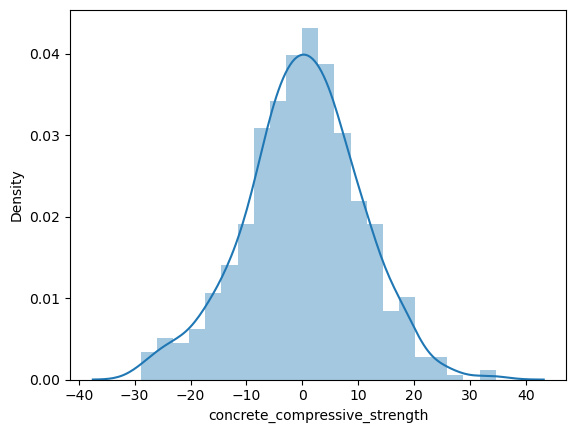

In [41]:
sns.distplot(residual)

#### 2.QQ Plot

In [42]:
import statsmodels.api as sm

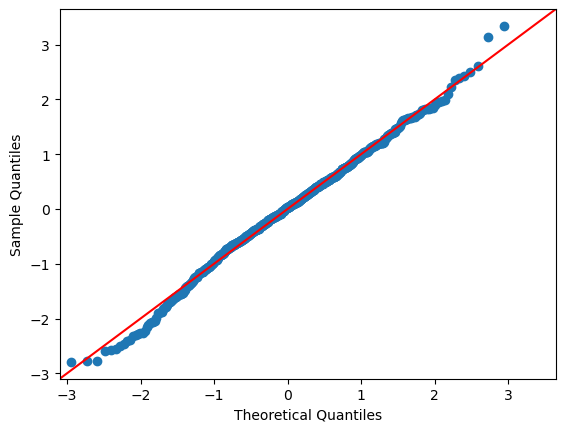

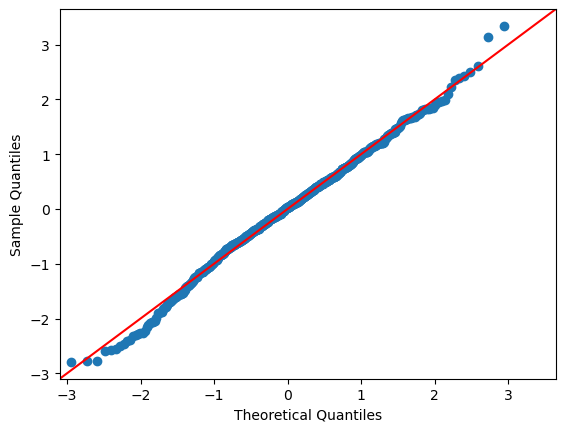

In [43]:
sm.qqplot(residual,line = "45",fit = True)

#### 3.Hypothesis testing

##### 1.shapiro testing

In [44]:
from scipy.stats import shapiro

In [45]:
stats,p_val = shapiro(residual)
print(stats)
print(p_val)

0.9955897331237793
0.07758602499961853


In [46]:
_,p_val = shapiro(residual)
print('P Value is :',p_val)

if p_val >= 0.05:
    print('Data is normally distributed')
    print('Null hypothesis is true')
else:
    print('Data is not normally distributed')
    print('Alternate hypothesis is true')

P Value is : 0.07758602499961853
Data is normally distributed
Null hypothesis is true


##### 2.ks test

In [47]:
from scipy.stats import kstest

In [48]:
residual = y_train - y_pred_train
residual

371    -1.757976
32      2.881016
530    12.159987
640    -1.695229
985     0.679333
         ...    
360    -2.735300
466    -1.185387
299   -10.656528
493    -7.389787
527   -13.655214
Name: concrete_compressive_strength, Length: 618, dtype: float64

In [49]:
_,p_val = kstest(residual,'norm')
print('P Value is :',p_val)

if p_val >= 0.05:
    print('Data is normally distributed')
    print('Null hypothesis is true')
else:
    print('Data is not normally distributed')
    print('Alternate hypothesis is true')

P Value is : 8.877208036060645e-93
Data is not normally distributed
Alternate hypothesis is true


##### 3.Normal test

In [50]:
from scipy.stats import normaltest

In [51]:
_, p_val = normaltest(residual)
print("P Value is :", p_val)

if p_val >= 0.05:
    print("Data is normally distributed")
    print("NULL Hypothesis is True")
    
else:
    print("Data is not normally distributed")
    print("Alternate Hypothesis is True")

P Value is : 0.2156015943633545
Data is normally distributed
NULL Hypothesis is True


#### 4.Skewness

In [52]:
from scipy.stats import skew

Mean     : -1.8729354636783223e-14
Median   : 0.32839083583708195
Skewness : -0.12659044384235493
Skewness : -0.12628297808947483


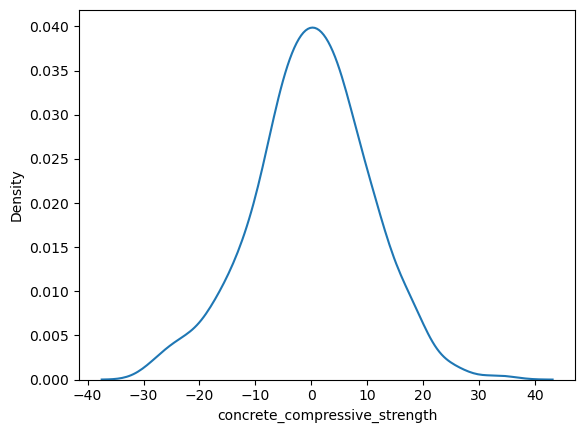

In [53]:
sns.kdeplot(residual)
s1 = residual
print('Mean     :',s1.mean())
print('Median   :',s1.median())
print('Skewness :',s1.skew())
print('Skewness :',skew(s1))

#### 4 .Homoscedascticity

In [54]:
residual_train = y_train-y_pred_train
residual

371    -1.757976
32      2.881016
530    12.159987
640    -1.695229
985     0.679333
         ...    
360    -2.735300
466    -1.185387
299   -10.656528
493    -7.389787
527   -13.655214
Name: concrete_compressive_strength, Length: 618, dtype: float64

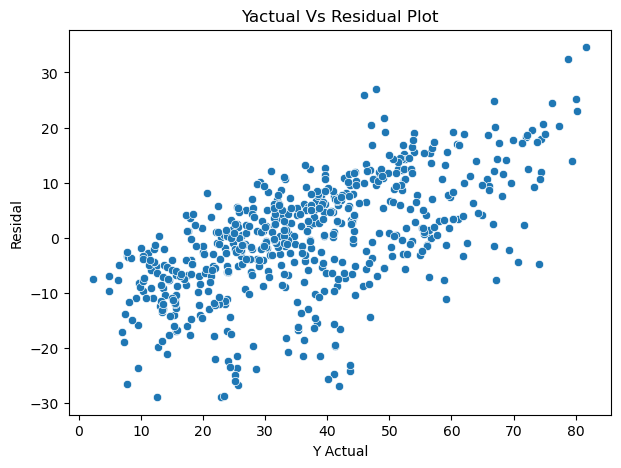

In [55]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = y_train, y = residual_train)
plt.xlabel('Y Actual')
plt.ylabel("Residal")
plt.title("Yactual Vs Residual Plot")
plt.savefig('Homoscedasticity.png')

#### Single Row Testing

In [56]:
x_test

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
456,194.7,0.0,100.5,170.2,7.5,998.0,901.8,56
988,153.6,144.2,112.3,220.1,10.1,923.2,657.9,28
809,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28
581,181.9,272.8,0.0,185.7,0.0,1012.4,714.3,7
549,333.0,0.0,0.0,192.0,0.0,931.2,842.6,90
...,...,...,...,...,...,...,...,...
803,393.0,0.0,0.0,192.0,0.0,940.0,758.0,3
440,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,28
453,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,56
601,339.0,0.0,0.0,197.0,0.0,968.0,781.0,28


In [57]:
x_test[10:11]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
941,133.1,210.2,0.0,195.7,3.1,949.4,795.3,28


In [58]:
linear_reg.predict(x_test[10:11])

array([21.59471928])

In [59]:
linear_reg.predict(x_test[10:11])[0]

21.594719275055226

In [64]:
columns_names = x.columns.tolist()
columns_names

['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'fine_aggregate ',
 'age']

In [65]:
linear_reg.n_features_in_

8

In [66]:
cement = 133.1
blast_furnace_slag = 210.2
fly_ash = 0.0
water = 195.7
superplasticizer = 3.1
coarse_aggregate = 949.4
fine_aggregate = 795.3
age = 28

test_array = np.zeros([1,linear_reg.n_features_in_])
test_array[0,0] = cement
test_array[0,1] = blast_furnace_slag
test_array[0,2] = fly_ash
test_array[0,3] = water
test_array[0,4] = superplasticizer
test_array[0,5] = coarse_aggregate
test_array[0,6] = fine_aggregate
test_array[0,7] = age

predict_concrete_strength = np.around(linear_reg.predict(test_array)[0],7)
predict_concrete_strength

21.5947193

In [68]:
with open("linear_regression.pkl","wb") as f:
    pickle.dump(linear_reg,f)